Movie Plot Analysis

Import all the needed packages for making a dataframe and to apply natural language processing algorithms and machine learning on it<br>

pandas = for the dataframe<br>
nltk = for the natural language processing<br>
sklearn = for machine learning<br>

Research Question: How effective is LogisticRegression in comparision to Linear Support Vector Machine when it comes to classifying the movie plots into genre categories?<br>

Hypothesis: Logistic Regression will performe worse than Linear Support Vector Machine, because in the latter the plots can be better matched into genres, since plots tend to be divers in its topics, making it more likely to fit into 2 different genres

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import re
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import LatentDirichletAllocation

Load the data and transform it into a dataframe df<br>
Trim it to 10000 rows, because it tends to interprete for 30min otherwise<br>
then have a look at it by showing the first 10 entrances with df.head(10)

In [42]:
df = pd.read_csv('../NLP/movie.csv')
df_small = df[:10000]
print(df_small.shape)
df_small.head(10)

(10000, 8)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab..."
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....


Check for duplicates in the dataframe and count them to better see if there are any

In [43]:
print(df_small[df_small.duplicated()].count())

Release Year        0
Title               0
Origin/Ethnicity    0
Director            0
Cast                0
Genre               0
Wiki Page           0
Plot                0
dtype: int64


No, there are no duplicates in the dataframe<br>

Check for NaNs and fill them with value "unknown"

In [73]:
missing= df_small[df_small.isna().any(axis=1)]
print(missing)
df_small = df_small.fillna("unknown")
df_small

Empty DataFrame
Columns: [Release Year, Title, Origin/Ethnicity, Director, Cast, Genre, Wiki Page, Plot, processed_text]
Index: []


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,processed_text
0,1901,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",bartender working saloon serving drink custome...
1,1901,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",moon painted smiling face hang park night youn...
2,1901,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",film minute long composed two shot first girl ...
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,lasting second consisting two shot first shot ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,earliest known adaptation classic fairytale fi...
...,...,...,...,...,...,...,...,...,...
9995,1982,Night Shift,American,Ron Howard,"Henry Winkler, Michael Keaton, Shelley Long",comedy,https://en.wikipedia.org/wiki/Night_Shift_(film),"Chuck, formerly a successful stockbroker, has ...",chuck formerly successful stockbroker found re...
9996,1982,An Officer and a Gentleman,American,Taylor Hackford,"Richard Gere, Louis Gossett, Jr., Debra Winger...",drama,https://en.wikipedia.org/wiki/An_Officer_and_a...,"Zachary ""Zack"" Mayo is preparing to report to ...",zachary zack mayo preparing report aviation of...
9997,1982,One from the Heart,American,Francis Ford Coppola,"Teri Garr, Frederic Forrest, Nastassja Kinski,...","drama, musical",https://en.wikipedia.org/wiki/One_from_the_Heart,"The evening of July 4, in Las Vegas, Hank, a m...",evening july la vega hank mechanic frannie tra...
9998,1982,Pandemonium,American,Al Sole,"Tom Smothers, Paul Reubens, Carol Kane",comedy,https://en.wikipedia.org/wiki/Pandemonium_(film),"In the fictional town of It Had To Be, Indiana...",fictional town indiana fullback blue grange sc...


The NaNs of Genre are now filled with "unknown"-strings

Check the datatypes

In [45]:
df_small.dtypes

Release Year         int64
Title               object
Origin/Ethnicity    object
Director            object
Cast                object
Genre               object
Wiki Page           object
Plot                object
dtype: object

Drop every column not needed for the next step, text classification: Genre and Plot remain

In [46]:
df_small.drop(['Release Year','Title','Origin/Ethnicity','Director','Cast','Wiki Page'], axis=1)

,Genre,Plot
0,unknown,"A bartender is working at a saloon, serving dr..."
1,unknown,"The moon, painted with a smiling face hangs ov..."
2,unknown,"The film, just over a minute long, is composed..."
3,unknown,Lasting just 61 seconds and consisting of two ...
4,unknown,The earliest known adaptation of the classic f...
...,...,...
9995,comedy,"Chuck, formerly a successful stockbroker, has ..."
9996,drama,"Zachary ""Zack"" Mayo is preparing to report to ..."
9997,"drama, musical","The evening of July 4, in Las Vegas, Hank, a m..."
9998,comedy,"In the fictional town of It Had To Be, Indiana..."


Preprocess the text:
Introduce the function WordNetLemmatizer() as the variable lemmatizer to apply it later<br>
Then get the list of english stopwords (= words without meaningful meaning such as "be", "because", "you") as the variable stop_words


In [47]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

Preprocessing function to apply it later on a specific df-column

In [48]:
def preprocess_text(text):
    # Remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)   #if it is not a letter replace it with blank
    # Convert to lowercase                  
    text = text.lower()                     #convert the text to lowercase
    # Remove single characters
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    # Lemmatize and remove stopwords        #defining the wordstem and removing "a","and",is"..
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(text)




Create a new column on the df, which is created by applying the preprocess function to the "Genre-column" of the df

In [49]:
df_small['processed_text'] = df_small['Plot'].apply(preprocess_text)

setting X as the feature that it shall work with<br>
setting y as the feature it shall classificate

make binary dummies out of X and y because it cant work with strings, basically columns of Trues and Falses

In [50]:
X = df_small['processed_text']
y = df_small['Genre']
label = LabelEncoder()
for dataset in df_small:
   X_train = label.fit_transform(X)
   X2_train = label.fit_transform(X)



Split the Model into 80-20 ratio, shuffle it so that it random, and set a random state to always start from that starting point (to always get the same results)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Vectorize the data so the model can work with it

In [52]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


X2_train = vectorizer.fit_transform(X2_train)
X2_test = vectorizer.transform(X2_test)


 # check the shape of the variables, because it just  doesnt work

Train the model with LogisticRegression by predicting the class of existing values from the dataframe<br>

then determine the accuracy score of the learning to evaluate if its good

In [53]:
logreg_clf = LogisticRegression(max_iter=1000) #use the function LogisticRegression with maximum 1000 iterations as a variable
logreg_clf.fit(X_train, y_train)
pred_logreg = logreg_clf.predict(X_test)

#show accuracy score of the classification
acc_logreg = accuracy_score(y_test, pred_logreg)


linsvc_clf = LinearSVC(dual=False)
linsvc_clf.fit(X2_train, y2_train)
pred_linsvc = linsvc_clf.predict(X2_test)
acc_linsvc = accuracy_score(y2_test, pred_linsvc)


print('Accuracy Score for Logistic Regression:',acc_logreg,'Accuracy Score for Linear Support Vector Machine:',acc_linsvc)

0.3755 0.3905


The accuracy score for the logistic regression classification 0.3755 is quite low, since many movies/movie plots can be categorized into 2 genres. The closer it gets to 1 the better as 1 would be 100% accuracy.<br>
In comparision the Linear Suuport Vector Machine worked a bit better with a Score of 0.3905.
In this case to classify the movie plots into genres some should prefer LSVM over LR.

Pros of Logistic Regression:<br>
  -->easy to implement and to train<br>
  -->does not assume distributions of classes in feature spaces<br>
  -->very fast at classifying unknown records<br>
<br>
Cons of Logistic Regression: <br>
   -->tends to overfitting if less observation data than features<br>
   -->struggles with large datasets<br>
   -->assumes linear boundaries<br>

Source:Advantages and Disadvantages of Logistic Regression. Geeks for Geeks. URL: https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/ 27.06.23


Pros of Linear Support Vector Machines: <br>
-->works well if seperation between classes is clear<br>
-->more efficient in high dimensional spaces<br>
-->relatively memory efficient<br>
<br>
Cons of Linear Support Vector Machines:<br>
-->has difficulties with large datasets<br>
-->has difficulties when classes overlap<br>
-->above and below the classifying hyperplane there is no probabilistic explanation for the classification<br>

In [54]:
#values for the model it shall now classify
inputdata = [] 
inputdata2 = []
#theoretically there would the actual movie plot go in to get classified, but somehow it still wants 40000+ features to work with. 
#Since I've been struggeling with the training more than I expected, I just haven't had time to wrap my head around that. I assume it divided the strings into its actual binaries, which somehow can be figured out. 
#Probably by printing the X values in a transformed way.
# Make prediction
inputdata_out = logreg_clf.predict(inputdata) #model gets the incoming data
print("The output of the classification is", inputdata_out)

inputdata_out2 = linsvc_clf.predict(inputdata2) #model gets the incoming data
print("The output of the classification is", inputdata_out2)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Sentiment Analysis of Movie Plots and their Movie Titles

Sorry as I told you I thought we had to do 10 questions and just now read that the methods from class are not allowed. Since I can't plot a not fully functioning text classification well, I left the following in. (Also because it was quite fun to look at it and I want to use the dataset later in my free time as well to practise.)

2. Question:
Are there more movies with a positive plot than negative ones and does a movie title in general represent the emotion of the plot? Or does it differ?

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
import wordcloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\susi_\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
df = pd.read_csv('../NLP/movie.csv', delimiter=',', encoding= 'latin-1')
df.head(10)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab..."
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....


In [ ]:
def sentiment_scores(dataframe):
    sid_obj = SentimentIntensityAnalyzer()
    
    dataframe['compound'] = dataframe['Plot'].apply(lambda x: sid_obj.polarity_scores(x)['compound'])
    
    def get_sentiment(compound):
        if compound >= 0.05:
            return "positive"
        elif compound <= -0.05:
            return "negative"
        else:
            return "neutral"
        
    dataframe['vader_sentiment'] = dataframe['compound'].apply(get_sentiment)
    return dataframe

df = sentiment_scores(df)

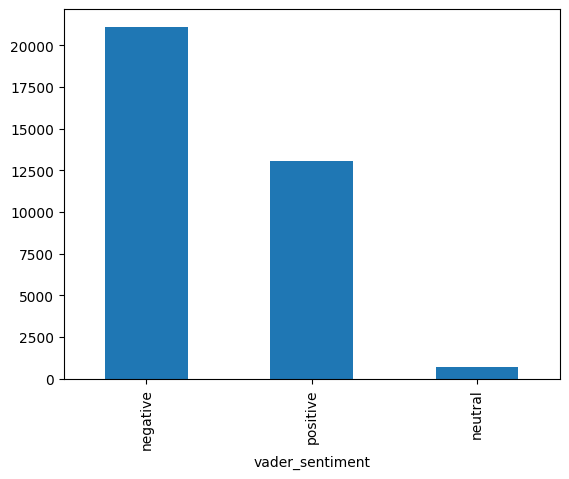

In [ ]:
Plotfeeling =  df['vader_sentiment'].value_counts()
Plotfeeling.plot(kind='bar')
plt.show()

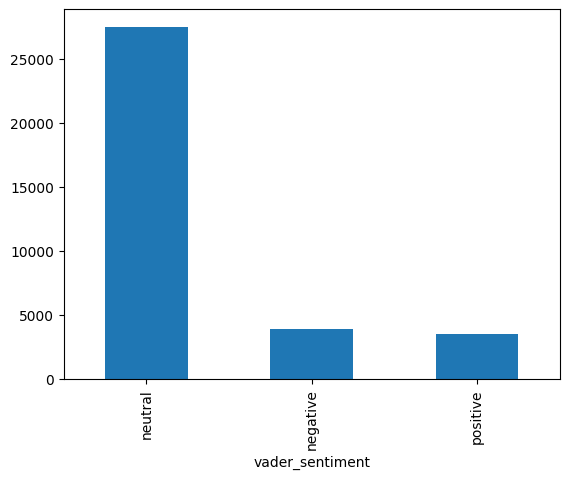

In [ ]:
def sentiment_scores(dataframe):
    sid_obj = SentimentIntensityAnalyzer()
    
    dataframe['compound'] = dataframe['Title'].apply(lambda x: sid_obj.polarity_scores(x)['compound'])
    
    def get_sentiment(compound):
        if compound >= 0.05:
            return "positive"
        elif compound <= -0.05:
            return "negative"
        else:
            return "neutral"
        
    dataframe['vader_sentiment'] = dataframe['compound'].apply(get_sentiment)
    return dataframe

df = sentiment_scores(df)

Titlefeeling = df['vader_sentiment'].value_counts()
Titlefeeling.plot(kind='bar')
plt.show()

3. In which Topics can the titles be differentiated? and which topic modeling model works better for this data set LDA or NMF

In [55]:
df = pd.read_csv('../NLP/movie.csv', delimiter=',', encoding= 'latin-1')

In [56]:
# Initialize a Lemmatizer
lemmatizer = WordNetLemmatizer()

# Text Preprocessing function
def preprocess_text(text):
    # Lower case
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    # Tokenization
    text = text.split()
    # Remove stop words and Lemmatize
    text = [lemmatizer.lemmatize(word) for word in text if word not in stopwords.words('english')]
    # Join words to a single string
    return ' '.join(text)

In [57]:
df['processed_text'] = df['Title'].apply(preprocess_text)

In [58]:
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
term_matrix = count_vectorizer.fit_transform(df['processed_text'])

In [59]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [60]:
# Display the topics from the model: For each index and topic of the lda.components print Topic with the index and the 10 most common words of the titles
for idx, topic in enumerate(lda.components_):
    print ("Topic ", idx, " ".join(count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]))

Topic  0 time men angel kid ki american ka dog game kill
Topic  1 love woman black world war new red star big moon
Topic  2 man life secret heart dark come road blood wife eye
Topic  3 àµ night day boy house city street ¾à death wild
Topic  4 girl movie lady mr little story king murder return way


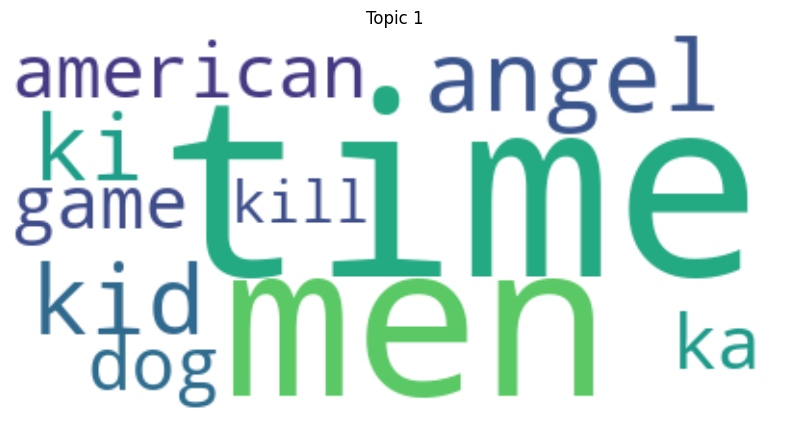

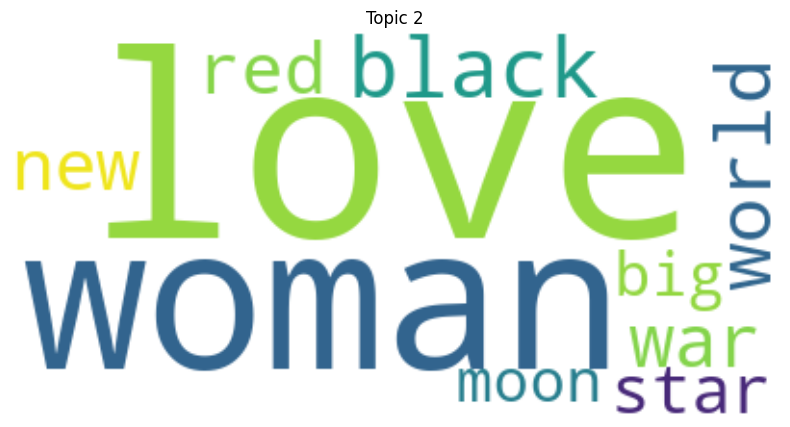

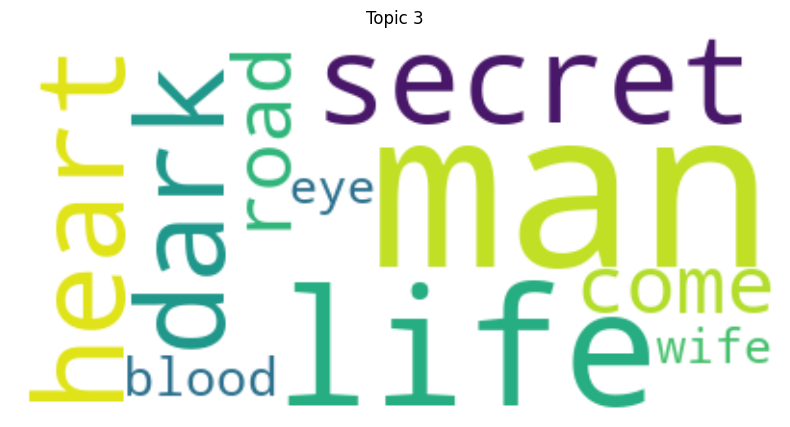

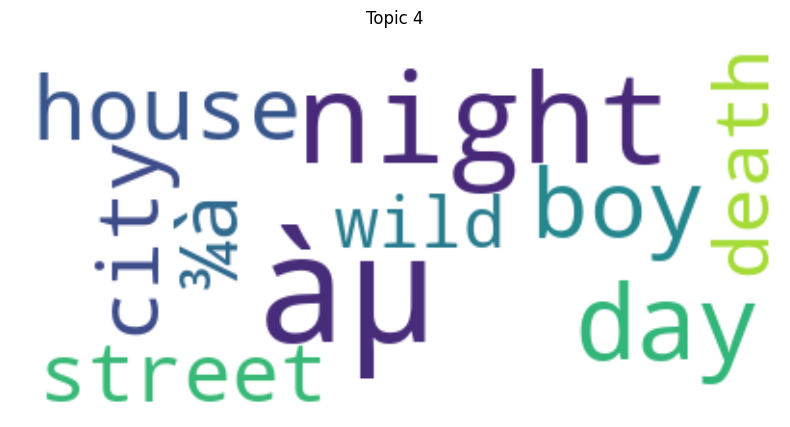

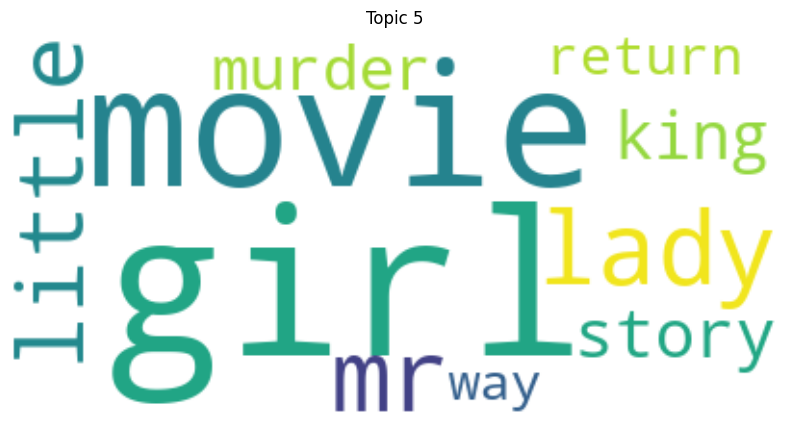

In [69]:
# Get the feature names from count vectorizer
feature_names = count_vectorizer.get_feature_names_out()

# Get the topics and their top 10 words for LDA
lda_topics = [[(feature_names[i], topic[i]) for i in topic.argsort()[:-11:-1]] for topic in lda.components_]

for i, topic in enumerate(lda_topics):
    wc = WordCloud(background_color="white", max_words=2000)
    wc.generate_from_frequencies(dict(topic)) #creates a wordcloud from the frequencies of the words/topics appearing, previously converted into a dictionary {}
    
    plt.figure(figsize=(10,5)) #size of the figure
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off") #removes axes to present a "picture" instead of a graph
    plt.title(f'Topic {i+1}')
    plt.show() #shows the "picture"


Topic 1 could be named : thriller action movie? <br>
Topic 2 could be named : 1940s love in times of war movies? <br>
Topic 3 could be named : spy love movies like james bond? <br>
Topic 4 could be named : city crimes? <br>
Topic 5 could be named : childrens history movies?<br>

Trying the Non-negative Matrix Factorization

Topic  0 love story time war life money letter affair book lady
Topic  1 man iron dead best gun little face lady house ip
Topic  2 night day troublesome big white saturday dead watch eye remember
Topic  3 girl boy little life town city time big bad movie
Topic  4 woman men little black dark red life world death secret


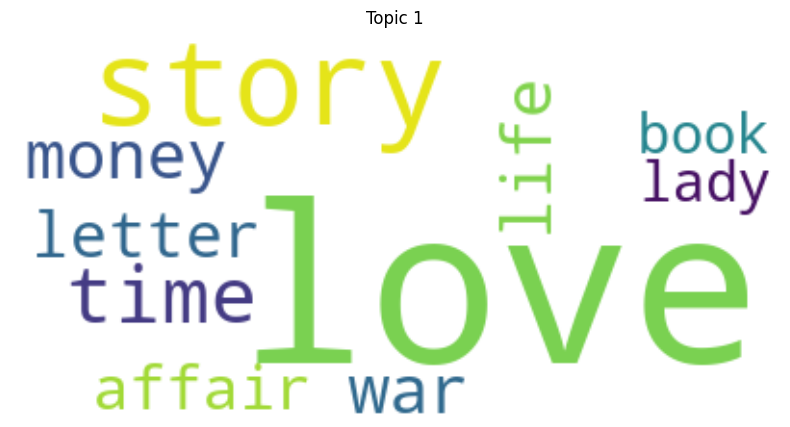

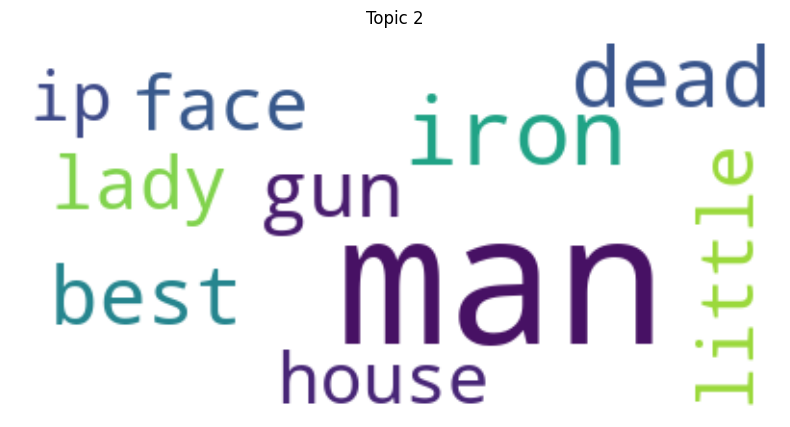

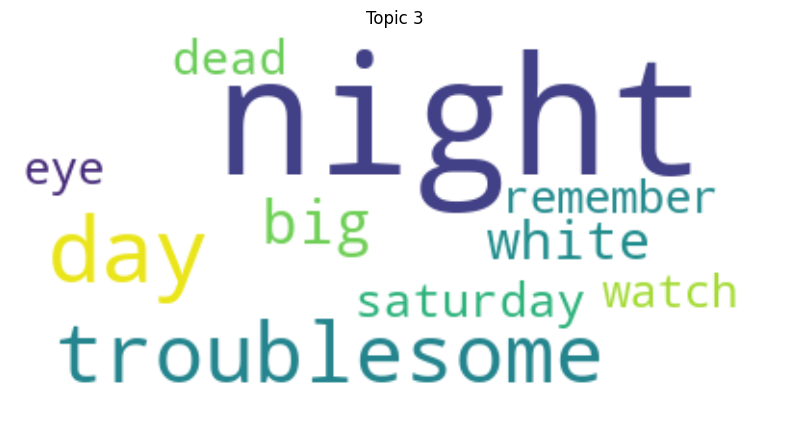

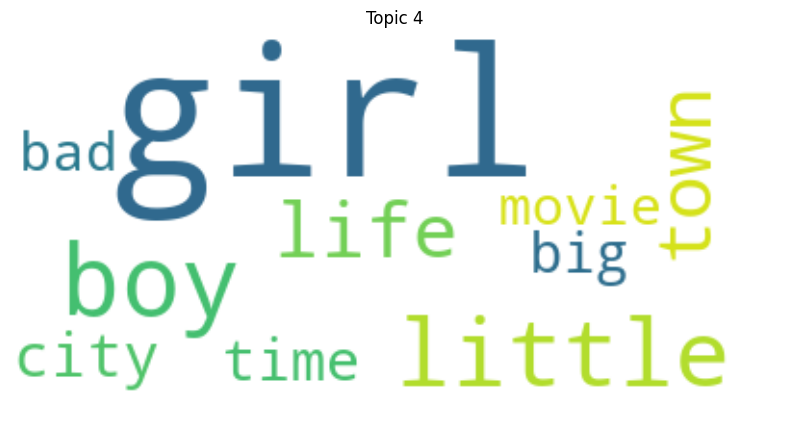

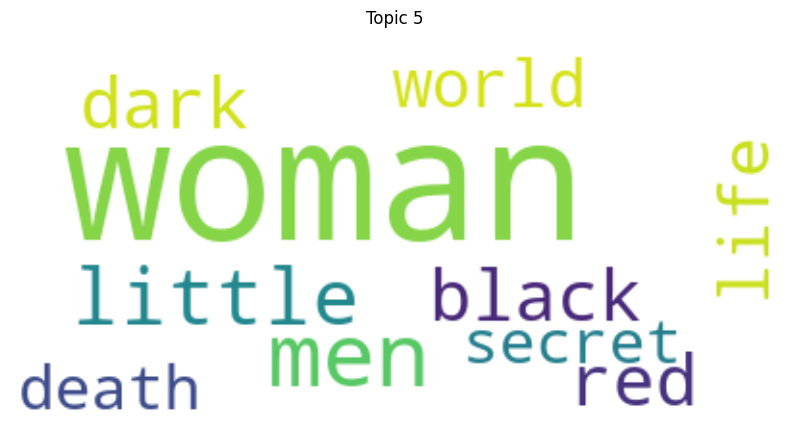

In [70]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

nmf = NMF(n_components=5, random_state=42)
nmf.fit(tfidf)

for idx, topic in enumerate(nmf.components_):
    print ("Topic ", idx, " ".join(tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]))


# Get the feature names from tfidf vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the topics and their top 10 words for NMF
nmf_topics = [[(feature_names[i], topic[i]) for i in topic.argsort()[:-11:-1]] for topic in nmf.components_]

for i, topic in enumerate(nmf_topics):
    wc = WordCloud(background_color="white", max_words=2000)
    wc.generate_from_frequencies(dict(topic))
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Topic {i+1}')
    plt.show()

Topic 1: Movies similar to The great Gatsby<br>
Topic 2: murder/horror action movies? <br>
Topic 3: thrillers at night?<br>
Topic 4: children to teenage movies <br>
Topic 5: Spying women movies?<br>

To find key topic merely by looking at the frequency of words does not work well with both methods, because the title dataset is too small. The topics are still confusing and hard to interprete, which is a problem anyway since everyone could interprete them a bit differently. I assume it would work much better with the plots. 

Sources if not stated otherwise:<br>
NLP/Machine Learning Course Material by Krusic,Lucija: Github. programming2SS23: https://github.com/lucijakrusic/programming2SS23 jupyternotebooks in the sections NLP and data science/machine_learning [27.06.2023]

Movie Data set proudly presented by Kaggle: https://www.kaggle.com/datasets/jrobischon/wikipedia-movie-plots/download?datasetVersionNumber=1   [27.06.2023]